# **1. Perkenalan Dataset**

## 📊 **Bitcoin Historical Price Dataset**

**Sumber Dataset:** Yahoo Finance (via library `yfinance`)

**Periode Data:** 1 Januari 2019 - 17 Desember 2025 (5 tahun)

**Jumlah Records:** ~1825 hari trading

**Ukuran File:** ~300 KB (sangat ringan)

**Deskripsi:**
Dataset ini berisi data historis harga Bitcoin (BTC-USD) yang dikumpulkan dari Yahoo Finance. Data mencakup informasi harian seperti harga pembukaan (Open), tertinggi (High), terendah (Low), penutupan (Close), dan volume transaksi (Volume).

**Kolom Dataset:**
- `Date` (Index): Tanggal trading
- `Open`: Harga pembukaan (USD)
- `High`: Harga tertinggi (USD)
- `Low`: Harga terendah (USD)
- `Close`: Harga penutupan (USD)
- `Adj Close`: Harga penutupan yang disesuaikan
- `Volume`: Volume transaksi

**Problem Statement:**
Membangun model machine learning untuk **memprediksi arah pergerakan harga Bitcoin** (NAIK atau TURUN) pada hari berikutnya berdasarkan data historis 30 hari terakhir.

**Target Variable:**
- `1` = Harga NAIK (Close besok > Close hari ini)
- `0` = Harga TURUN (Close besok ≤ Close hari ini)

**Business Value:**
Model ini dapat digunakan sebagai sistem signal trading otomatis untuk membantu trader membuat keputusan buy/sell dengan risiko yang lebih terukur.

**Catatan:**
Dataset ini akan di-update secara otomatis setiap hari melalui GitHub Actions untuk mendukung re-training model yang berkelanjutan.

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print(f"Libraries imported successfully - {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries imported successfully - 2025-12-17 19:55:50


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
start_date = '2019-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

print(f"Downloading Bitcoin data: {start_date} to {end_date}")
btc_data = yf.download('BTC-USD', start=start_date, end=end_date, progress=True)

btc_data.to_csv('btc_raw.csv')
print(f"Data saved: btc_raw.csv\n")

info_df = pd.DataFrame({
    'Metric': ['Total Records', 'Date Range', 'Columns', 'Memory Usage'],
    'Value': [
        f"{btc_data.shape[0]} rows",
        f"{btc_data.index[0].strftime('%Y-%m-%d')} to {btc_data.index[-1].strftime('%Y-%m-%d')}",
        f"{btc_data.shape[1]} features",
        f"{btc_data.memory_usage(deep=True).sum() / 1024:.2f} KB"
    ]
})
display(info_df)

print("\nFirst 5 rows:")
display(btc_data.head())

print("\nLast 5 rows:")
display(btc_data.tail())

print("\nStatistical Summary:")
display(btc_data.describe())

[*********************100%***********************]  1 of 1 completed

Data saved: btc_raw.csv



,Metric,Value
0,Total Records,2542 rows
1,Date Range,2019-01-01 to 2025-12-16
2,Columns,5 features
3,Memory Usage,119.16 KB



First 5 rows:


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990
2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836
2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219
2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467
2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824



Last 5 rows:


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-12-12,90270.414062,92747.929688,89532.601562,92513.664062,80275884583
2025-12-13,90298.710938,90647.570312,89800.992188,90257.796875,64237748110
2025-12-14,88175.179688,90498.109375,87634.937500,90296.437500,50465972205
2025-12-15,86419.781250,89983.921875,85304.078125,88171.078125,45559514323
2025-12-16,87843.984375,88170.093750,85381.687500,86424.406250,41262178223



Statistical Summary:


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,2542.000000,2542.000000,2542.000000,2542.000000,2.542000e+03
mean,41241.913163,42024.107631,40350.861882,41210.339428,3.366687e+10
std,32166.531936,32677.174870,31602.100042,32162.403565,2.140812e+10
min,3399.471680,3427.945557,3391.023682,3401.376465,4.324201e+09
25%,11775.890137,11965.636963,11496.381104,11769.687744,1.897982e+10
50%,31753.560547,32694.957031,30328.404297,31673.121094,2.898912e+10
75%,60682.888672,61771.960938,59318.511719,60665.191406,4.251011e+10
max,124752.531250,126198.070312,123196.046875,124752.140625,3.509679e+11


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Missing Values Analysis:


,Column,Missing Count,Percentage
0,"(Close, BTC-USD)",0,0.0
1,"(High, BTC-USD)",0,0.0
2,"(Low, BTC-USD)",0,0.0
3,"(Open, BTC-USD)",0,0.0
4,"(Volume, BTC-USD)",0,0.0


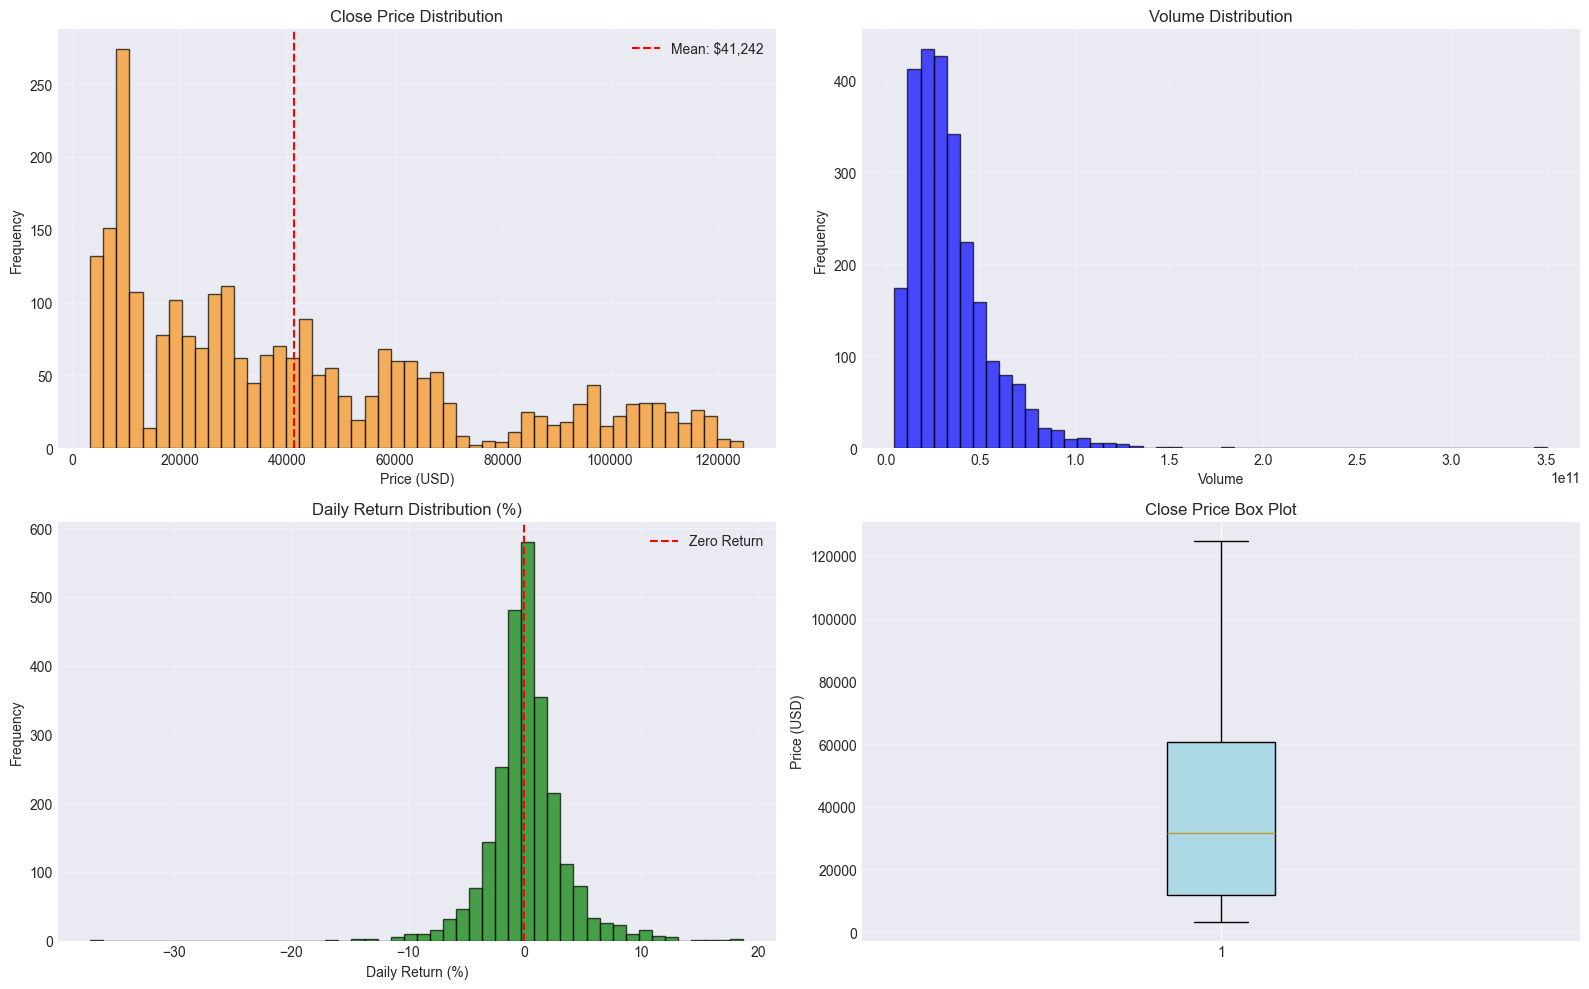


Daily Return Statistics:


,Metric,Value (%)
0,Mean,0.176809
1,Median,0.073206
2,Std Dev,3.254001
3,Min,-37.169539
4,Max,18.746474


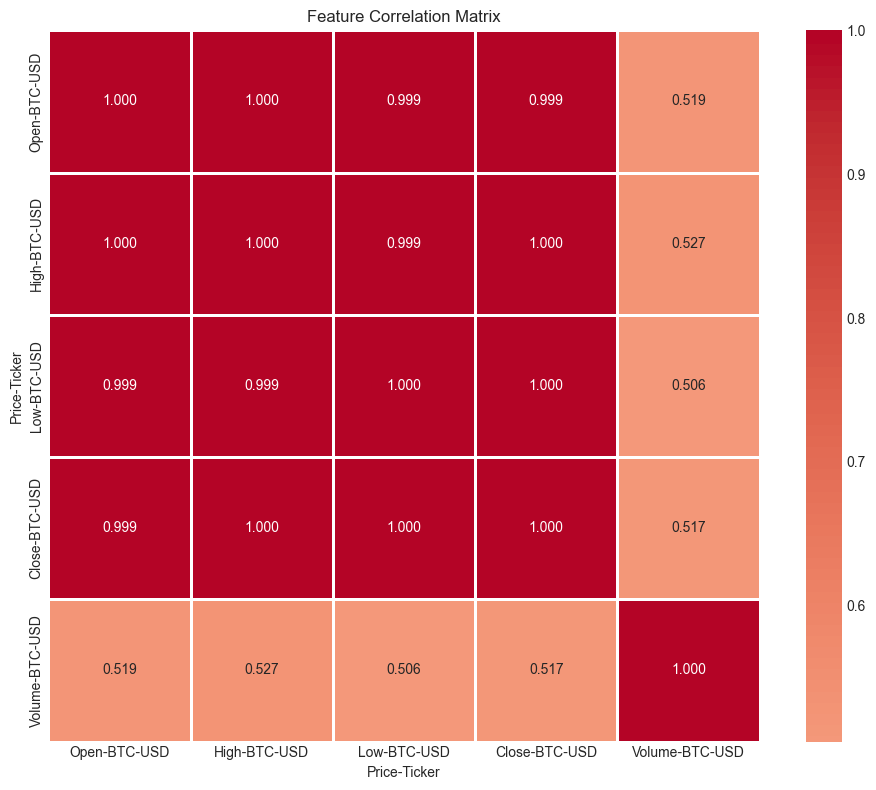

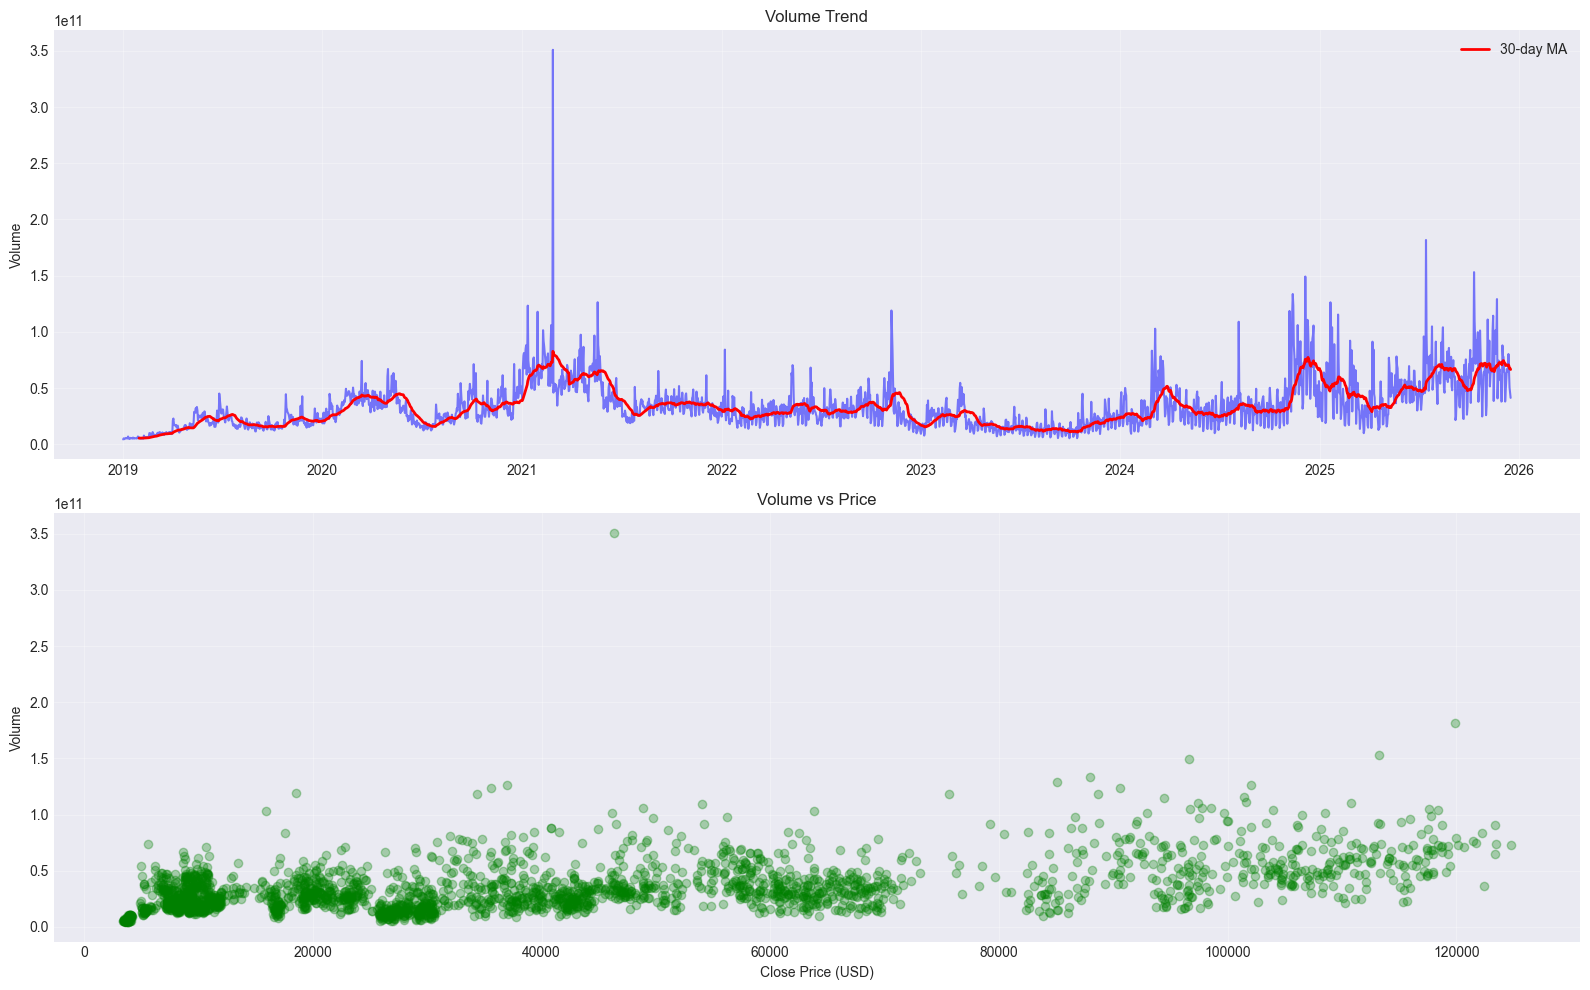


Volume Statistics:


,Metric,Volume
0,Average,"33,666,871,958"
1,Maximum,"350,967,941,479"
2,Minimum,"4,324,200,990"


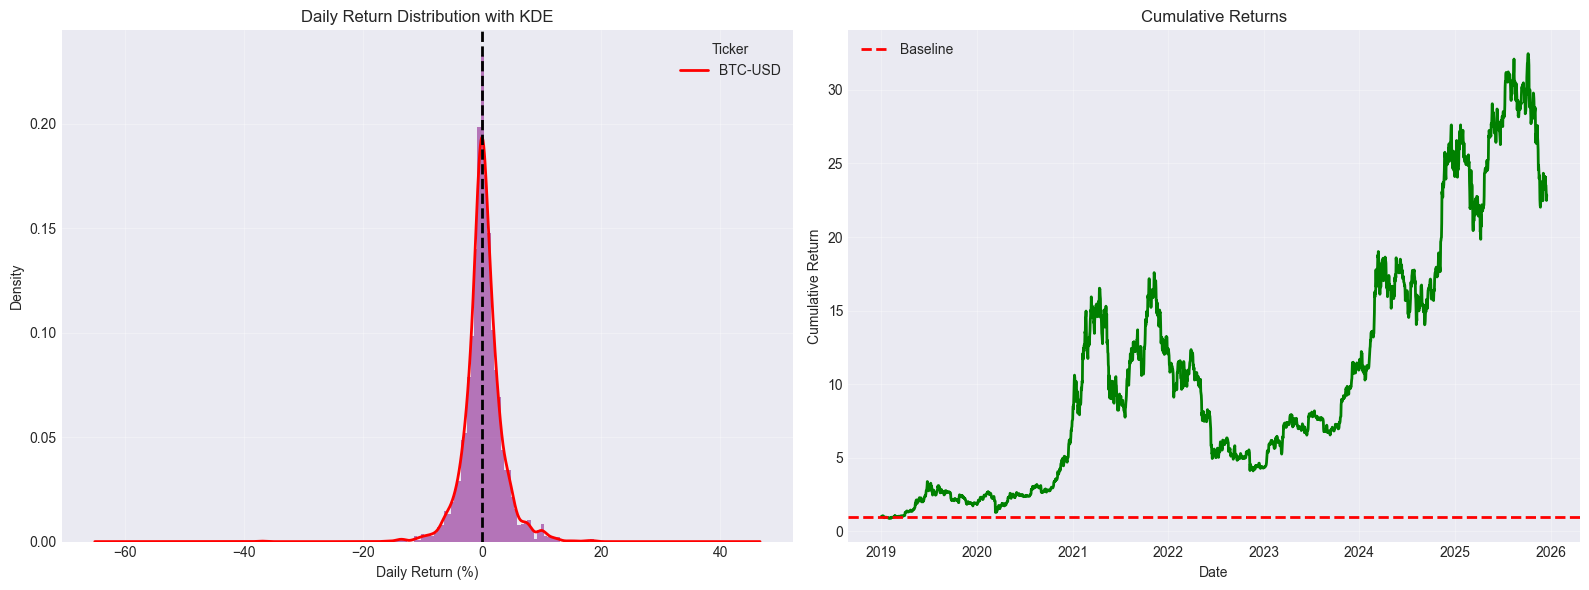


Return Classification:


,Type,Count,Percentage
0,Positive Days,1300,51.16
1,Negative Days,1241,48.84
2,Zero Returns,0,0.00



Key Statistics Summary:


,Metric,Value
0,Highest Price,"$124,752.53"
1,Lowest Price,"$3,399.47"
2,Current Price,"$87,843.98"
3,Average Price,"$41,241.91"
4,Median Price,"$31,753.56"
5,Price Volatility (Std),"$32,166.53"
6,Total Trading Days,2542 days
7,Avg Daily Return,0.1768%
8,Total Return,2185.51%


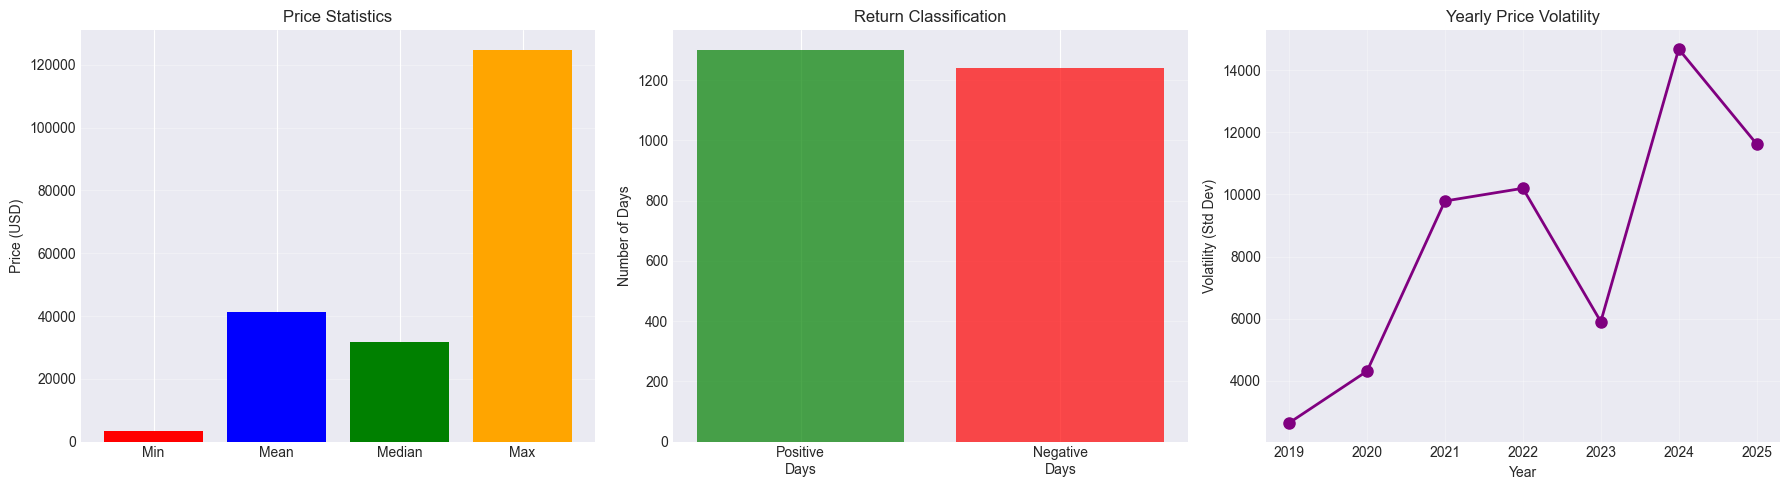

In [7]:
missing_values = btc_data.isnull().sum()
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': (missing_values.values / len(btc_data) * 100).round(2)
})
print("Missing Values Analysis:")
display(missing_df)

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Bitcoin Close Price', 'Trading Volume'),
    vertical_spacing=0.1,
    row_heights=[0.7, 0.3]
)

fig.add_trace(
    go.Scatter(x=btc_data.index, y=btc_data['Close'], name='Close Price',
               line=dict(color='#F7931A', width=2)),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=btc_data.index, y=btc_data['Volume'], name='Volume',
           marker_color='lightblue'),
    row=2, col=1
)

fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)
fig.update_layout(height=700, showlegend=True, hovermode='x unified')
fig.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

close_mean = float(btc_data['Close'].mean())
axes[0, 0].hist(btc_data['Close'], bins=50, color='#F7931A', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Close Price Distribution')
axes[0, 0].set_xlabel('Price (USD)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(close_mean, color='red', linestyle='--', 
                    label=f'Mean: ${close_mean:,.0f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(btc_data['Volume'], bins=50, color='blue', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Volume Distribution')
axes[0, 1].set_xlabel('Volume')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

daily_return = btc_data['Close'].pct_change() * 100
axes[1, 0].hist(daily_return.dropna(), bins=50, color='green', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Daily Return Distribution (%)')
axes[1, 0].set_xlabel('Daily Return (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(0, color='red', linestyle='--', label='Zero Return')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].boxplot(btc_data['Close'], patch_artist=True, 
                   boxprops=dict(facecolor='lightblue'))
axes[1, 1].set_title('Close Price Box Plot')
axes[1, 1].set_ylabel('Price (USD)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

return_stats = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max'],
    'Value (%)': [
        float(daily_return.mean()),
        float(daily_return.median()),
        float(daily_return.std()),
        float(daily_return.min()),
        float(daily_return.max())
    ]
})
print("\nDaily Return Statistics:")
display(return_stats)

correlation = btc_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.3f', 
            linewidths=1, square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

axes[0].plot(btc_data.index, btc_data['Volume'], color='blue', alpha=0.5)
axes[0].plot(btc_data.index, btc_data['Volume'].rolling(window=30).mean(), 
             color='red', linewidth=2, label='30-day MA')
axes[0].set_title('Volume Trend')
axes[0].set_ylabel('Volume')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(btc_data['Close'], btc_data['Volume'], alpha=0.3, color='green')
axes[1].set_title('Volume vs Price')
axes[1].set_xlabel('Close Price (USD)')
axes[1].set_ylabel('Volume')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

volume_stats = pd.DataFrame({
    'Metric': ['Average', 'Maximum', 'Minimum'],
    'Volume': [
        f"{float(btc_data['Volume'].mean()):,.0f}",
        f"{float(btc_data['Volume'].max()):,.0f}",
        f"{float(btc_data['Volume'].min()):,.0f}"
    ]
})
print("\nVolume Statistics:")
display(volume_stats)

daily_returns = btc_data['Close'].pct_change() * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(daily_returns.dropna(), bins=100, color='purple', alpha=0.5, density=True)
daily_returns.dropna().plot(kind='kde', ax=axes[0], color='red', linewidth=2)
axes[0].axvline(0, color='black', linestyle='--', linewidth=2)
axes[0].set_title('Daily Return Distribution with KDE')
axes[0].set_xlabel('Daily Return (%)')
axes[0].set_ylabel('Density')
axes[0].grid(True, alpha=0.3)

cumulative_returns = (1 + daily_returns / 100).cumprod()
cumulative_returns_clean = cumulative_returns.dropna()
axes[1].plot(cumulative_returns_clean.index, cumulative_returns_clean.values, 
             color='green', linewidth=2)
axes[1].set_title('Cumulative Returns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cumulative Return')
axes[1].axhline(1, color='red', linestyle='--', linewidth=2, label='Baseline')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

return_classification = pd.DataFrame({
    'Type': ['Positive Days', 'Negative Days', 'Zero Returns'],
    'Count': [
        int((daily_returns > 0).sum()),
        int((daily_returns < 0).sum()),
        int((daily_returns == 0).sum())
    ]
})
return_classification['Percentage'] = (return_classification['Count'] / len(daily_returns.dropna()) * 100).round(2)
print("\nReturn Classification:")
display(return_classification)

summary_stats = pd.DataFrame({
    'Metric': [
        'Highest Price',
        'Lowest Price',
        'Current Price',
        'Average Price',
        'Median Price',
        'Price Volatility (Std)',
        'Total Trading Days',
        'Avg Daily Return',
        'Total Return'
    ],
    'Value': [
        f"${float(btc_data['Close'].max()):,.2f}",
        f"${float(btc_data['Close'].min()):,.2f}",
        f"${float(btc_data['Close'].iloc[-1]):,.2f}",
        f"${float(btc_data['Close'].mean()):,.2f}",
        f"${float(btc_data['Close'].median()):,.2f}",
        f"${float(btc_data['Close'].std()):,.2f}",
        f"{len(btc_data)} days",
        f"{float(daily_returns.mean()):.4f}%",
        f"{((float(btc_data['Close'].iloc[-1]) / float(btc_data['Close'].iloc[0])) - 1) * 100:.2f}%"
    ]
})
print("\nKey Statistics Summary:")
display(summary_stats)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

price_stats = ['Min', 'Mean', 'Median', 'Max']
price_values = [
    float(btc_data['Close'].min()), 
    float(btc_data['Close'].mean()), 
    float(btc_data['Close'].median()), 
    float(btc_data['Close'].max())
]
axes[0].bar(price_stats, price_values, color=['red', 'blue', 'green', 'orange'])
axes[0].set_title('Price Statistics')
axes[0].set_ylabel('Price (USD)')
axes[0].grid(True, alpha=0.3, axis='y')

positive_returns = int((daily_returns > 0).sum())
negative_returns = int((daily_returns < 0).sum())
axes[1].bar(['Positive\nDays', 'Negative\nDays'], [positive_returns, negative_returns], 
            color=['green', 'red'], alpha=0.7)
axes[1].set_title('Return Classification')
axes[1].set_ylabel('Number of Days')
axes[1].grid(True, alpha=0.3, axis='y')

btc_data_temp = btc_data.copy()
btc_data_temp['Year'] = btc_data_temp.index.year
yearly_volatility = btc_data_temp.groupby('Year')['Close'].std()
axes[2].plot(yearly_volatility.index, yearly_volatility.values, 
             marker='o', linewidth=2, markersize=8, color='purple')
axes[2].set_title('Yearly Price Volatility')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Volatility (Std Dev)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Creating technical indicators...
Sample of engineered features:


Price,Close,MA_7,MA_30,RSI,Price_Change,Volume_Change,HL_Spread,MACD
Ticker,BTC-USD,,,,,,,
Date,,,,,,,,
2025-12-07,90405.640625,90343.853795,92771.790625,57.533825,1.269447,24.742975,3941.281250,-2271.569414
2025-12-08,90640.203125,90960.801339,92383.726823,55.227428,0.259456,21.097629,2622.226562,-2089.143365
2025-12-09,92691.710938,91152.445312,91982.795833,61.244651,2.263353,16.495811,5014.593750,-1758.756027
2025-12-10,92020.945312,90937.179688,91516.940885,53.530066,-0.723652,-2.155235,2837.023438,-1533.371114
2025-12-11,92511.335938,90989.995536,91167.403125,52.918126,0.532912,-1.357154,4218.968750,-1300.193697
2025-12-12,90270.414062,91116.089286,90787.644010,48.582103,-2.422321,24.395411,3215.328125,-1281.450815
2025-12-13,90298.710938,91262.708705,90474.351302,48.789385,0.031347,-19.978773,846.578125,-1249.905492
2025-12-14,88175.179688,90944.071429,90266.930990,45.472571,-2.351674,-21.438759,2863.171875,-1380.345062


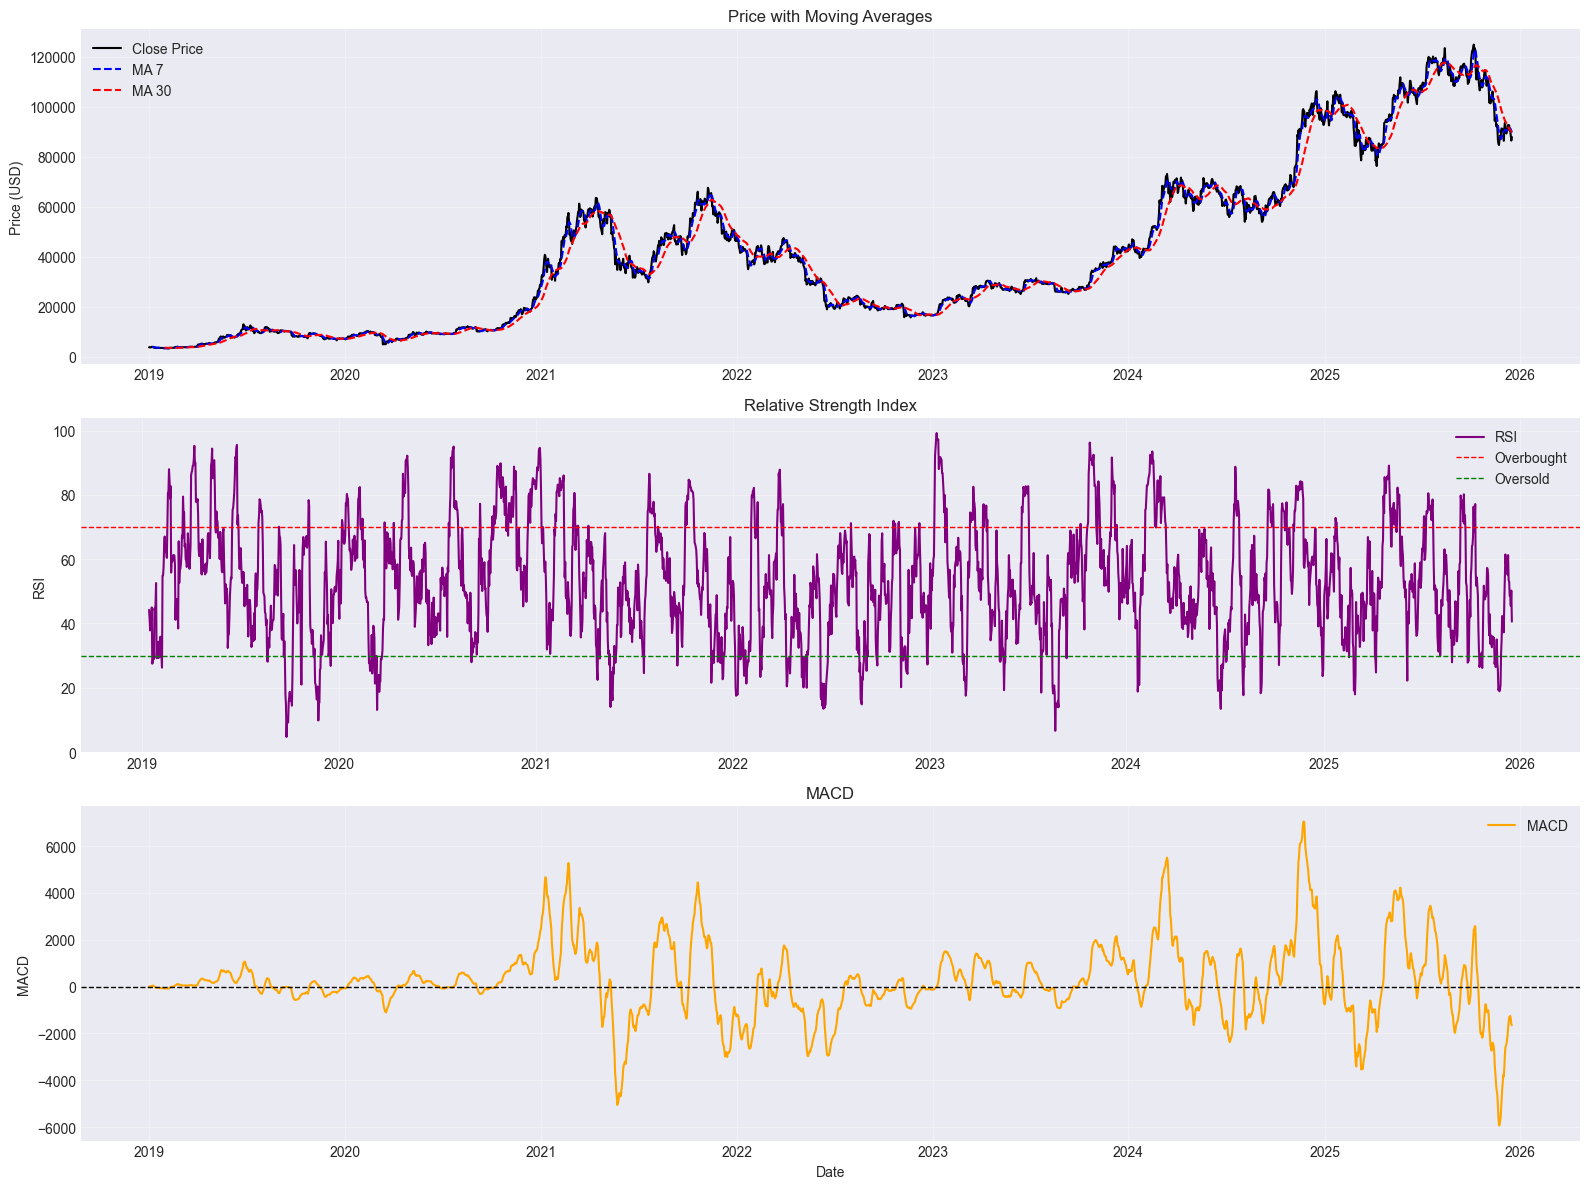


Target Distribution:


,Class,Count,Percentage
0,TURUN (0),1242,49.42
1,NAIK (1),1300,51.73


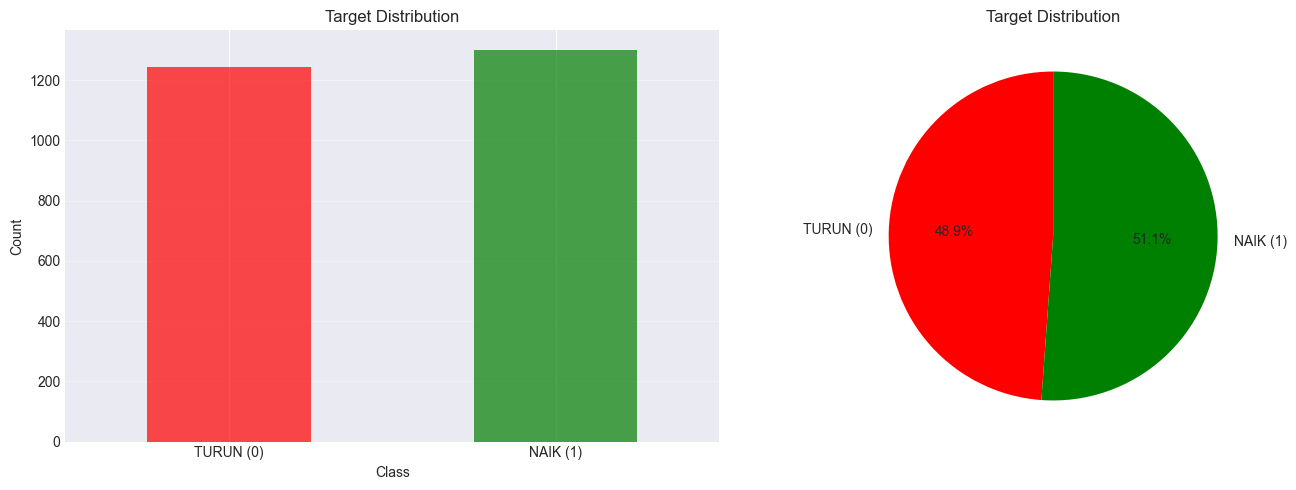


Data Cleaning Summary:


,Stage,Rows,Missing Values
0,Before Cleaning,2542,50
1,After Cleaning,2513,0



Features selected: 12 features
Dataset shape: X=(2513, 12), y=(2513,)

Train-Test Split:


,Dataset,Samples,Percentage,Class 0,Class 1
0,Train,2010,80.0%,981,1029
1,Test,503,20.0%,246,257



Sample data before scaling:


Price,Open,High,Low,Close,Volume,MA_7,MA_30,RSI,Price_Change,Volume_Change,HL_Spread,MACD
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,
Date,,,,,,,,,,,,
2025-02-24,96277.960938,96503.453125,91371.742188,91418.171875,44046480529,95843.498884,98097.521354,33.907471,-5.043682,159.104885,5131.710938,-1173.411289
2022-12-12,17102.500000,17212.564453,16899.394531,17206.437500,19617581341,17106.230469,16739.369759,67.628354,0.597772,38.910247,313.169922,-90.376711
2020-08-02,11758.764648,12034.144531,11018.129883,11053.614258,27410067336,11178.864537,9755.368652,76.178798,-6.003427,5.117403,1016.014648,545.423058



Sample data after scaling:


Price,Open,High,Low,Close,Volume,MA_7,MA_30,RSI,Price_Change,Volume_Change,HL_Spread,MACD
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,
Date,,,,,,,,,,,,
2025-02-24,0.765356,0.758047,0.734366,0.725279,0.220724,0.774227,0.829651,0.309014,0.574538,0.644476,0.285498,0.366353
2022-12-12,0.112905,0.111982,0.112753,0.113671,0.082476,0.114312,0.115599,0.665773,0.675429,0.329618,0.016431,0.449813
2020-08-02,0.068870,0.069788,0.063663,0.062963,0.126575,0.064634,0.054303,0.756235,0.557374,0.241095,0.055678,0.498809


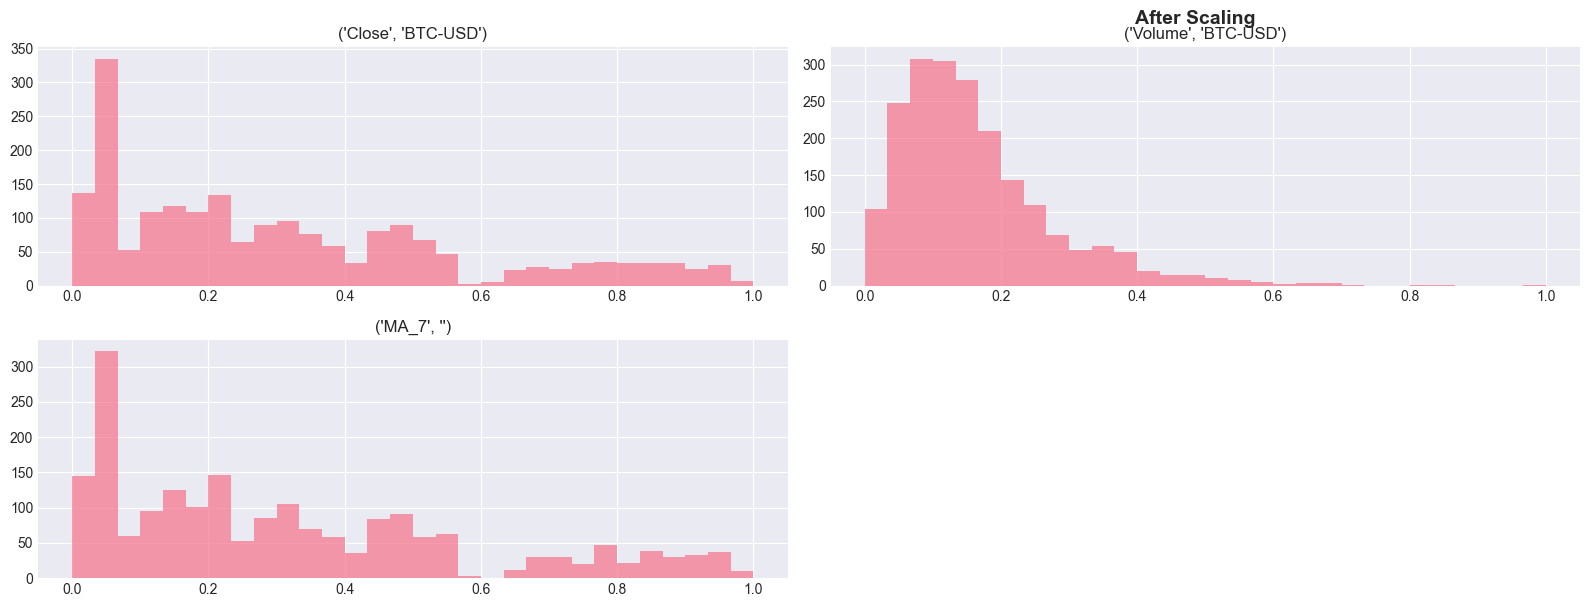


Preprocessing Summary:


,Step,Details
0,Original Dataset,"2542 rows, 13 columns"
1,Feature Engineering,7 technical indicators created
2,Target Creation,"Binary classification (0=TURUN, 1=NAIK)"
3,Missing Values Handling,29 rows removed
4,Feature Selection,12 features selected
5,Train-Test Split,"Train: 2010, Test: 503"
6,Normalization,"MinMaxScaler applied (range [0, 1])"
7,Final Dataset,"2513 rows, 13 columns"



Files created:
  - btc_raw.csv
  - btc_preprocessing.csv
  - scaler.pkl


In [9]:
df = btc_data.copy()

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

print("Creating technical indicators...")
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['RSI'] = calculate_rsi(df['Close'])
df['Price_Change'] = df['Close'].pct_change() * 100
df['Volume_Change'] = df['Volume'].pct_change() * 100
df['HL_Spread'] = df['High'] - df['Low']

exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2

print("Sample of engineered features:")
display(df[['Close', 'MA_7', 'MA_30', 'RSI', 'Price_Change', 'Volume_Change', 'HL_Spread', 'MACD']].tail(10))

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

axes[0].plot(df.index, df['Close'], label='Close Price', color='black', linewidth=1.5)
axes[0].plot(df.index, df['MA_7'], label='MA 7', color='blue', linewidth=1.5, linestyle='--')
axes[0].plot(df.index, df['MA_30'], label='MA 30', color='red', linewidth=1.5, linestyle='--')
axes[0].set_title('Price with Moving Averages')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(df.index, df['RSI'], label='RSI', color='purple', linewidth=1.5)
axes[1].axhline(70, color='red', linestyle='--', linewidth=1, label='Overbought')
axes[1].axhline(30, color='green', linestyle='--', linewidth=1, label='Oversold')
axes[1].set_title('Relative Strength Index')
axes[1].set_ylabel('RSI')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(df.index, df['MACD'], label='MACD', color='orange', linewidth=1.5)
axes[2].axhline(0, color='black', linestyle='--', linewidth=1)
axes[2].set_title('MACD')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('MACD')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

target_counts = df['Target'].value_counts().sort_index()
target_dist = pd.DataFrame({
    'Class': ['TURUN (0)', 'NAIK (1)'],
    'Count': target_counts.values,
    'Percentage': (target_counts.values / len(df.dropna()) * 100).round(2)
})
print("\nTarget Distribution:")
display(target_dist)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

target_counts.plot(kind='bar', ax=axes[0], color=['red', 'green'], alpha=0.7)
axes[0].set_title('Target Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['TURUN (0)', 'NAIK (1)'], rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].pie(target_counts, labels=['TURUN (0)', 'NAIK (1)'], autopct='%1.1f%%', 
            colors=['red', 'green'], startangle=90)
axes[1].set_title('Target Distribution')

plt.tight_layout()
plt.show()

missing_before = df.isnull().sum().sum()
rows_before = df.shape[0]

df_clean = df.dropna()

missing_after = df_clean.isnull().sum().sum()
rows_after = df_clean.shape[0]

cleaning_summary = pd.DataFrame({
    'Stage': ['Before Cleaning', 'After Cleaning'],
    'Rows': [rows_before, rows_after],
    'Missing Values': [missing_before, missing_after]
})
print("\nData Cleaning Summary:")
display(cleaning_summary)

features = ['Open', 'High', 'Low', 'Close', 'Volume', 
            'MA_7', 'MA_30', 'RSI', 'Price_Change', 
            'Volume_Change', 'HL_Spread', 'MACD']

X = df_clean[features]
y = df_clean['Target']

print(f"\nFeatures selected: {len(features)} features")
print(f"Dataset shape: X={X.shape}, y={y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

split_info = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'Samples': [X_train.shape[0], X_test.shape[0]],
    'Percentage': [
        f"{X_train.shape[0]/len(X)*100:.1f}%",
        f"{X_test.shape[0]/len(X)*100:.1f}%"
    ],
    'Class 0': [(y_train == 0).sum(), (y_test == 0).sum()],
    'Class 1': [(y_train == 1).sum(), (y_test == 1).sum()]
})
print("\nTrain-Test Split:")
display(split_info)

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("\nSample data before scaling:")
display(X_train.head(3))

print("\nSample data after scaling:")
display(X_train_scaled.head(3))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

X_train[['Close', 'Volume', 'MA_7']].hist(ax=axes[0], bins=30, alpha=0.7)
fig.text(0.25, 0.98, 'Before Scaling', ha='center', fontsize=14, weight='bold')

X_train_scaled[['Close', 'Volume', 'MA_7']].hist(ax=axes[1], bins=30, alpha=0.7)
fig.text(0.75, 0.98, 'After Scaling', ha='center', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

preprocessed_df = df_clean[features + ['Target']]
preprocessed_df.to_csv('btc_preprocessing.csv')

import joblib
joblib.dump(scaler, 'scaler.pkl')

summary = pd.DataFrame({
    'Step': [
        'Original Dataset',
        'Feature Engineering',
        'Target Creation',
        'Missing Values Handling',
        'Feature Selection',
        'Train-Test Split',
        'Normalization',
        'Final Dataset'
    ],
    'Details': [
        f"{df.shape[0]} rows, {df.shape[1]} columns",
        "7 technical indicators created",
        "Binary classification (0=TURUN, 1=NAIK)",
        f"{df.shape[0] - df_clean.shape[0]} rows removed",
        f"{len(features)} features selected",
        f"Train: {len(X_train)}, Test: {len(X_test)}",
        "MinMaxScaler applied (range [0, 1])",
        f"{preprocessed_df.shape[0]} rows, {preprocessed_df.shape[1]} columns"
    ]
})

print("\nPreprocessing Summary:")
display(summary)

print("\nFiles created:")
print("  - btc_raw.csv")
print("  - btc_preprocessing.csv")
print("  - scaler.pkl")